In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from plt_overfit import overfit_example, output
from lab_utils_common import sigmoid
np.set_printoptions(precision=8)
import copy
import math

[ 1.8171250e+01 -5.5900000e-01  5.0000000e-01 -1.9627000e+01
 -1.2860000e+00 -3.8160000e+00 -8.2250000e+00  3.2254000e+01
  1.7648869e+01  3.4000000e-02 -5.0000000e-03  9.7530000e+00
  4.5770000e+00  2.0780000e+00 -9.6000000e-02  3.1575000e+01
  1.7651105e+01  1.1100000e-01 -2.1000000e-02  1.1145000e+01
  5.5100000e-01 -5.7500000e-01 -1.2780000e+00  3.1665000e+01
  1.7653339e+01 -3.2000000e-02 -2.1700000e-01  1.0671000e+01
  2.9180000e+00  2.2560000e+00  4.6900000e-01  3.2740000e+01
  1.7655574e+01  2.7100000e-01  1.8800000e-01  1.0103000e+01
  9.9100000e-01  2.7120000e+00  8.0000000e-02  3.2207000e+01
  1.7657809e+01  3.9000000e-01  2.2600000e-01  1.0717000e+01
 -4.9500000e-01  2.9110000e+00 -2.0050000e+00  3.1617000e+01
  1.7660044e+01  2.5300000e-01 -1.5000000e-01  9.4730000e+00
  1.3360000e+00  2.3840000e+00 -7.0800000e-01  3.1102000e+01
  1.7662279e+01  1.7500000e-01  2.5000000e-02  1.0046000e+01
 -4.0600000e-01 -3.6700000e-01 -8.0500000e-01  3.0212000e+01
  1.7664514e+01  2.54400

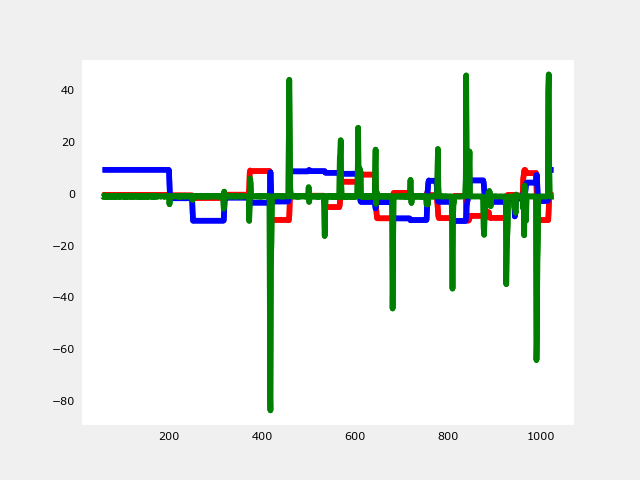

In [4]:
Data_p0 = np.loadtxt("ISS-Data/calib_Platine_0.txt",delimiter=" ")
print(Data_p0[0,:])
Time_p0 = Data_p0[:,0]
Accs_P0 = []
for i in np.arange(0,10):
    Accs_P0.append(Data_p0[:,1+i:4+i])
    
Data_p1 = np.loadtxt("ISS-Data/calib_Platine_1.txt",delimiter=" ")
Time_p1 = Data_p1[:,0]
Accs_P1 = []
for i in np.arange(0,10):
    Accs_P1.append(Data_p1[:,1+i:4+i])
    
Data_p2 = np.loadtxt("ISS-Data/calib_Platine_2.txt",delimiter=" ")
Time_p2 = Data_p2[:,0]
Accs_P2 = []
for i in np.arange(0,10):
    Accs_P2.append(Data_p2[:,1+i:4+i])
    
Data_p3 = np.loadtxt("ISS-Data/calib_Platine_3.txt",delimiter=" ")
Time_p3 = Data_p3[:,0]
Accs_P3 = []
for i in np.arange(0,10):
    Accs_P3.append(Data_p3[:,1+i:4+i])
    
Data_p4 = np.loadtxt("ISS-Data/calib_Platine_4.txt",delimiter=" ")
Time_p4 = Data_p4[:,0]
Accs_P4 = []
for i in np.arange(0,10):
    Accs_P4.append(Data_p4[:,1+i:4+i])

plt.plot(Time_p4,Accs_P4[9][:,0],'r')
plt.plot(Time_p4,Accs_P4[9][:,1],'b')
plt.plot(Time_p4,Accs_P4[9][:,2],'g')
plt.show()

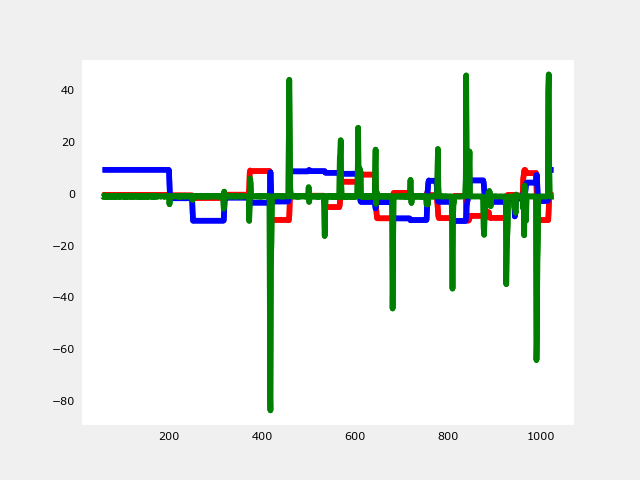

In [3]:
def feature_eng(Accs):
    X_train = np.zeros(shape=(len(Accs[:,1]), 9))
    X_train[:,:3] = Accs
    X_train[:,3] = X_train[:,0]**2
    X_train[:,4] = X_train[:,1]**2
    X_train[:,5] = X_train[:,2]**2
    X_train[:,6] = X_train[:,0]*X_train[:,1]
    X_train[:,7] = X_train[:,1]*X_train[:,2]
    X_train[:,8] = X_train[:,0]*X_train[:,2]
    
    return X_train

X_train = feature_eng(Accs_P4[9])
plt.plot(Time_p4,X_train[:,0],'r')
plt.plot(Time_p4,X_train[:,1],'b')
plt.plot(Time_p4,X_train[:,2],'g')
plt.show()

In [4]:
def join_x_trains(Accs_P0,Accs_P1,Accs_P2,Accs_P3,Accs_P4):
    X_trains_P0 = feature_eng(Accs_P0[0])
    X_trains_P1 = feature_eng(Accs_P1[0])
    X_trains_P2 = feature_eng(Accs_P2[0])
    X_trains_P3 = feature_eng(Accs_P3[0])
    X_trains_P4 = feature_eng(Accs_P4[0])
    for i in np.arange(1,10):
        X_trains_P0 = np.vstack((X_trains_P0,feature_eng(Accs_P0[i])))
        X_trains_P1 = np.vstack((X_trains_P1,feature_eng(Accs_P1[i])))    
        X_trains_P2 = np.vstack((X_trains_P2,feature_eng(Accs_P2[i])))
        X_trains_P3 = np.vstack((X_trains_P3,feature_eng(Accs_P3[i])))
        X_trains_P4 = np.vstack((X_trains_P4,feature_eng(Accs_P4[i])))
    
    X_trains_Pt = np.vstack((X_trains_P0,X_trains_P1,X_trains_P2,X_trains_P3,X_trains_P4))

    return X_trains_P0, X_trains_P1, X_trains_P2, X_trains_P3, X_trains_P4, X_trains_Pt

X_trains_P0, X_trains_P1, X_trains_P2, X_trains_P3, X_trains_P4, X_trains_Pt = join_x_trains(Accs_P0,Accs_P1,Accs_P2,Accs_P3,Accs_P4)

# Adding regularization

In [5]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return X_norm, mu, sigma
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)


# Adding regularization
<img align="Left" src="./images/C1_W3_LinearGradientRegularized.png"  style=" width:400px; padding: 10px; " >
<img align="Center" src="./images/C1_W3_LogisticGradientRegularized.png"  style=" width:400px; padding: 10px; " >

The slides above show the cost and gradient functions for both linear and logistic regression. Note:
- Cost
    - The cost functions differ significantly between linear and logistic regression, but adding regularization to the equations is the same.
- Gradient
    - The gradient functions for linear and logistic regression are very similar. They differ only in the implementation of $f_{wb}$.

## Cost functions with regularization
### Cost function for regularized linear regression

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 


Compare this to the cost function without regularization (which you implemented in  a previous lab), which is of the form:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

The difference is the regularization term,  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 
    
Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.

Below is an implementation of equations (1) and (2). Note that this uses a *standard pattern for this course*,   a `for loop` over all `m` examples.

In [6]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

## Gradient descent with regularization
The basic algorithm for running gradient descent does not change with regularization, it is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

What changes with regularization is computing the gradients.

### Computing the Gradient with regularization (both linear/logistic)
The gradient calculation for both linear and logistic regression are nearly identical, differing only in computation of $f_{\mathbf{w}b}$.
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target

      
* For a  <span style="color:blue"> **linear** </span> regression model  
    $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$  
* For a <span style="color:blue"> **logistic** </span> regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    
The term which adds regularization is  the <span style="color:blue">$\frac{\lambda}{m} w_j $</span>.

### Gradient function for regularized linear regression

In [7]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_linear_reg(x, y, w, b, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db
        
        #if b<0:
          #  b = 0
            
        if w[3]<0:
            w[3] = 1
        if w[4]<0:
            w[4] = 1
        if w[5]<0:
            w[5] = 1
            
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  compute_cost_linear_reg(x, y, w, b, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [9]:
def predict(X_norm,w_norm,b_norm):
    m = X_norm.shape[0]
    yp = np.zeros(m)
    for i in range(m):
        yp[i] = np.dot(X_norm[i], w_norm) + b_norm
    yp = yp.reshape(m,1)
    return yp


In [10]:
b_norm, w_norm
#w_norm[5]*sigma + mu
#w_norm
w_norm

NameError: name 'b_norm' is not defined

In [11]:
#6parameters
def calculate_param9(w_norm):
    sx = np.sqrt(w_norm[3])
    bx = w_norm[0]/(2*sx)
    rxy = w_norm[6]/(2*sx)
    sy = np.sqrt(w_norm[4]-rxy*rxy)
    by = ((w_norm[1]/2)-(rxy*bx))/sy
    rxz = w_norm[8]/(2*sx)
    ryz = ((w_norm[7]/2)-(rxy*rxz))/sy
    sz = np.sqrt(w_norm[5]-rxz*rxz-ryz*ryz)
    bz = ((w_norm[2]/2)-(rxz*bx)-(ryz*by))/sz
    return [sx,sy,sz,bx,by,bz,rxy,ryz,rxz]


In [24]:
Train_data = feature_eng(Accs_P2[9])#X_trains_P0, X_trains_P1, X_trains_P2, X_trains_P3, X_trains_P4, X_trains_Pt

x_train, x_test, y_train, y_test = train_test_split(Train_data, np.zeros(shape=(len(Train_data), 1))+1, test_size=0.20)

print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (756, 9)
The shape of y_train is:  (756, 1)
Number of training examples (m): 756


In [25]:
#from sklearn.preprocessing import scale
#x_train_norm = scale(x_train, axis=0, with_mean=True, with_std=True, copy=True)
x_train_norm, mu, sigma = zscore_normalize_features(x_train)
#y_train_norm, y_mu, y_sigma = zscore_normalize_features(y_train)

initial_w = np.random.rand(x_train_norm.shape[1]).reshape(-1,)-0.5
initial_b = 0.5
regu_lambda = 0.7
#cost_tmp = compute_cost_linear_reg(x_train_norm, y_train, initial_w, initial_b, regu_lambda)
#print("Regularized cost:", cost_tmp)
#dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(x_train_norm, y_train, initial_w, initial_b, regu_lambda)
#print(f"dj_db: {dj_db_tmp}", )
#print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

# some gradient descent settings
iterations = 500
alpha = 0.01

w_norm,b_norm,_,_ = gradient_descent(x_train_norm ,y_train, initial_w, initial_b, alpha, iterations, regu_lambda)

Iteration    0: Cost     1.16   
Iteration   50: Cost     0.29   
Iteration  100: Cost     0.11   
Iteration  150: Cost     0.05   
Iteration  200: Cost     0.02   
Iteration  250: Cost     0.01   
Iteration  300: Cost     0.01   
Iteration  350: Cost     0.00   
Iteration  400: Cost     0.00   
Iteration  450: Cost     0.00   


The mean of difference predicted g2 and reference g2 in seen dataset is: -0.00328524152120688
The std of difference predicted g2 and reference g2 in seen dataset is: -0.00328524152120688


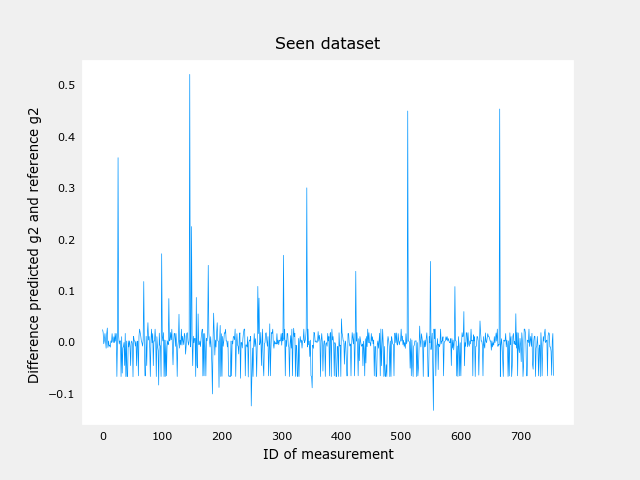

The mean of difference predicted g2 and reference g2 in unseen dataset is: -0.00328524152120691
The std of difference predicted g2 and reference g2 in unseen dataset is: -0.00328524152120691


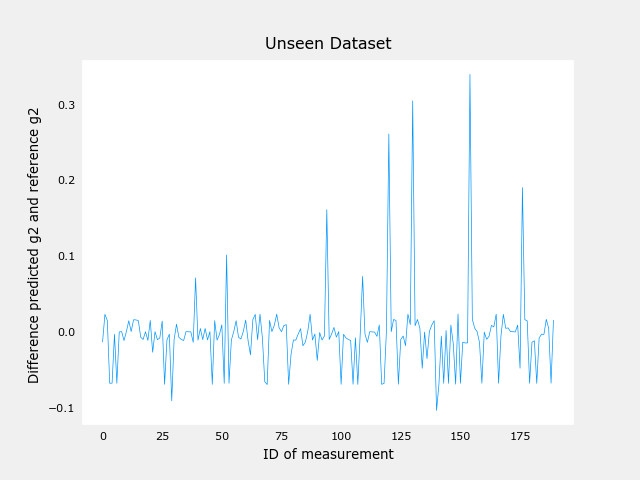

In [26]:
predicted_in_train = predict(x_train_norm,w_norm,b_norm)
erorr1 = predicted_in_train - y_train

print ('The mean of difference predicted g2 and reference g2 in seen dataset is:', np.mean(erorr1))
print ('The std of difference predicted g2 and reference g2 in seen dataset is:', np.mean(erorr1))

plt.figure()
plt.plot(erorr1,linewidth=0.5)
plt.xlabel('ID of measurement')
plt.ylabel('Difference predicted g2 and reference g2 ')
plt.title('Seen dataset')
plt.show()

x_test_norm, mu, sigma = zscore_normalize_features(x_test)
#y_test_norm, y_mu, y_sigma = zscore_normalize_features(y_test)

predicted_in_test = predict(x_test_norm,w_norm,b_norm)
erorr2 = predicted_in_test - y_test

print ('The mean of difference predicted g2 and reference g2 in unseen dataset is:', np.mean(erorr2))
print ('The std of difference predicted g2 and reference g2 in unseen dataset is:', np.mean(erorr2))

plt.figure()
plt.plot(erorr2,linewidth=0.5)
plt.xlabel('ID of measurement')
plt.ylabel('Difference predicted g2 and reference g2 ')
plt.title('Unseen Dataset')
plt.show()


In [27]:
par10_2 = calculate_param9(w_norm)
print(par10_2)

[0.1714879476731202, 0.18167471938267699, 0.15561147884289903, 0.01941159751271252, -0.01191768812733143, -0.01988496167516303, -0.00018556950173711907, 0.11925290950470048, 0.024250840096702576]


In [17]:
params = []
for i in np.arange(0,10):
    Train_data = feature_eng(Accs_P0[i])
    x_train, x_test, y_train, y_test = train_test_split(Train_data, np.zeros(shape=(len(Train_data), 1))+9.860, test_size=0.20)
    x_train_norm, mu, sigma = zscore_normalize_features(x_train)
    initial_w = np.random.rand(x_train_norm.shape[1]).reshape(-1,)-0.5
    initial_b = 0.5
    regu_lambda = 0.7
    iterations = 500
    alpha = 0.01
    w_norm,b_norm,_,_ = gradient_descent(x_train_norm ,y_train, initial_w, initial_b, alpha, iterations, regu_lambda)
    params.append(calculate_param9(w_norm))
    
    Train_data = feature_eng(Accs_P1[i])
    x_train, x_test, y_train, y_test = train_test_split(Train_data, np.zeros(shape=(len(Train_data), 1))+9.860, test_size=0.20)
    x_train_norm, mu, sigma = zscore_normalize_features(x_train)
    initial_w = np.random.rand(x_train_norm.shape[1]).reshape(-1,)-0.5
    w_norm,b_norm,_,_ = gradient_descent(x_train_norm ,y_train, initial_w, initial_b, alpha, iterations, regu_lambda)
    params.append(calculate_param9(w_norm))
    
    Train_data = feature_eng(Accs_P2[i])
    x_train, x_test, y_train, y_test = train_test_split(Train_data, np.zeros(shape=(len(Train_data), 1))+9.860, test_size=0.20)
    x_train_norm, mu, sigma = zscore_normalize_features(x_train)
    initial_w = np.random.rand(x_train_norm.shape[1]).reshape(-1,)-0.5
    w_norm,b_norm,_,_ = gradient_descent(x_train_norm ,y_train, initial_w, initial_b, alpha, iterations, regu_lambda)
    params.append(calculate_param9(w_norm))
    
    Train_data = feature_eng(Accs_P3[i])
    x_train, x_test, y_train, y_test = train_test_split(Train_data, np.zeros(shape=(len(Train_data), 1))+9.860, test_size=0.20)
    x_train_norm, mu, sigma = zscore_normalize_features(x_train)
    initial_w = np.random.rand(x_train_norm.shape[1]).reshape(-1,)-0.5
    w_norm,b_norm,_,_ = gradient_descent(x_train_norm ,y_train, initial_w, initial_b, alpha, iterations, regu_lambda)
    params.append(calculate_param9(w_norm))
    
    Train_data = feature_eng(Accs_P4[i])
    x_train, x_test, y_train, y_test = train_test_split(Train_data, np.zeros(shape=(len(Train_data), 1))+9.860, test_size=0.20)
    x_train_norm, mu, sigma = zscore_normalize_features(x_train)
    initial_w = np.random.rand(x_train_norm.shape[1]).reshape(-1,)-0.5
    w_norm,b_norm,_,_ = gradient_descent(x_train_norm ,y_train, initial_w, initial_b, alpha, iterations, regu_lambda)
    params.append(calculate_param9(w_norm))
    
print(params)
    

Iteration    0: Cost    43.03   
Iteration   50: Cost     5.14   
Iteration  100: Cost     0.49   
Iteration  150: Cost     0.21   
Iteration  200: Cost     0.02   
Iteration  250: Cost     0.01   
Iteration  300: Cost     0.01   
Iteration  350: Cost     0.01   
Iteration  400: Cost     0.01   
Iteration  450: Cost     0.01   


<ipython-input-11-cf651897549d>:10: RuntimeWarning: invalid value encountered in sqrt
  sz = np.sqrt(w_norm[5]-rxz*rxz-ryz*ryz)


Iteration    0: Cost    43.63   
Iteration   50: Cost    15.96   
Iteration  100: Cost     5.88   
Iteration  150: Cost     2.18   
Iteration  200: Cost     0.82   
Iteration  250: Cost     0.31   
Iteration  300: Cost     0.13   
Iteration  350: Cost     0.05   
Iteration  400: Cost     0.03   
Iteration  450: Cost     0.01   
Iteration    0: Cost    43.93   
Iteration   50: Cost    15.94   
Iteration  100: Cost     5.81   
Iteration  150: Cost     2.13   
Iteration  200: Cost     0.78   
Iteration  250: Cost     0.29   
Iteration  300: Cost     0.11   
Iteration  350: Cost     0.04   
Iteration  400: Cost     0.02   
Iteration  450: Cost     0.01   
Iteration    0: Cost    43.33   
Iteration   50: Cost    15.83   
Iteration  100: Cost     5.79   
Iteration  150: Cost     2.12   
Iteration  200: Cost     0.78   
Iteration  250: Cost     0.29   
Iteration  300: Cost     0.11   
Iteration  350: Cost     0.04   
Iteration  400: Cost     0.01   
Iteration  450: Cost     0.01   
Iteration 

<ipython-input-11-cf651897549d>:6: RuntimeWarning: invalid value encountered in sqrt
  sy = np.sqrt(w_norm[4]-rxy*rxy)


Iteration    0: Cost    43.82   
Iteration   50: Cost    15.97   
Iteration  100: Cost     5.87   
Iteration  150: Cost     2.17   
Iteration  200: Cost     0.81   
Iteration  250: Cost     0.31   
Iteration  300: Cost     0.32   
Iteration  350: Cost     0.13   
Iteration  400: Cost     0.06   
Iteration  450: Cost     0.04   
Iteration    0: Cost    43.67   
Iteration   50: Cost    15.92   
Iteration  100: Cost     5.84   
Iteration  150: Cost     2.16   
Iteration  200: Cost     0.81   
Iteration  250: Cost     0.31   
Iteration  300: Cost     0.12   
Iteration  350: Cost     0.05   
Iteration  400: Cost     0.02   
Iteration  450: Cost     0.01   
Iteration    0: Cost    44.08   
Iteration   50: Cost    15.93   
Iteration  100: Cost     5.84   
Iteration  150: Cost     2.16   
Iteration  200: Cost     0.80   
Iteration  250: Cost     0.30   
Iteration  300: Cost     0.12   
Iteration  350: Cost     0.05   
Iteration  400: Cost     0.02   
Iteration  450: Cost     0.01   
Iteration 

Iteration  450: Cost     0.20   
Iteration    0: Cost    43.04   
Iteration   50: Cost    15.75   
Iteration  100: Cost     5.76   
Iteration  150: Cost     2.11   
Iteration  200: Cost     0.77   
Iteration  250: Cost     0.28   
Iteration  300: Cost     0.10   
Iteration  350: Cost     0.04   
Iteration  400: Cost     0.01   
Iteration  450: Cost     0.01   
Iteration    0: Cost    43.28   
Iteration   50: Cost    15.84   
Iteration  100: Cost     5.81   
Iteration  150: Cost     2.14   
Iteration  200: Cost     0.80   
Iteration  250: Cost     0.30   
Iteration  300: Cost     0.12   
Iteration  350: Cost     0.05   
Iteration  400: Cost     0.02   
Iteration  450: Cost     0.01   
Iteration    0: Cost    44.40   
Iteration   50: Cost    15.78   
Iteration  100: Cost     5.79   
Iteration  150: Cost     2.13   
Iteration  200: Cost     0.80   
Iteration  250: Cost     0.30   
Iteration  300: Cost     0.38   
Iteration  350: Cost     0.15   
Iteration  400: Cost     0.06   
Iteration 

In [18]:
arr = np.array(params)
arr2 = arr
np.savetxt('param.txt', arr,fmt='%8.8f', delimiter=' ')
np.shape(arr2)
nan_rows = np.isnan(arr2).any(axis=1)
# Remove rows with NaN values
cleaned_data = arr2[~nan_rows]
np.savetxt('param2.txt', cleaned_data,fmt='%8.8f', delimiter=' ')

In [18]:
#6parameters
sx = np.sqrt(w_norm[3])
sy = np.sqrt(w_norm[4])
sz = np.sqrt(w_norm[5])
bx = w_norm[1]/(2*sx)
by = w_norm[2]/(2*sy)
bz = w_norm[3]/(2*sz)

print(bx*bx + by*by * bz*bz)
sx,sy,sz,bx,by,bz


0.03733976136354799


(0.5837008379643427,
 0.49183729824224653,
 0.1837310122547895,
 -0.19174518047000869,
 -0.02582952295905409,
 0.9271887855486256)

0.03733976136354799

In [32]:
bx, by, bz, sx, sy, sz = 0,0,0,1,1,1
#L = np.zeros((len(w_norm)+1,1)) + b_norm
#L[1:7,0] = w_norm
L = w_norm
#print(L)
delta = 1
while delta > 0.001:
#for i in np.arange(1,100,1):
    A = np.array([[2*sx,0,0,2*bx,0,0],
                  [0,2*sy,0,0,2*by,0],
                  [0,0,2*sz,0,0,2*bz],
                  [0,0,0,2*sx,0,0],
                  [0,0,0,0,2*sy,0],
                  [0,0,0,0,0,2*sz]])  #7 x 6
    #print(A)
    N = np.matmul(A.transpose(),A)
    n = np.matmul(A.transpose(),L)
    Qx = np.linalg.inv(N)
    dx = np.matmul(Qx,n)
    delta = max(abs(dx))
    #print(delta)
    bx, by, bz, sx, sy, sz = bx+dx[0], by+dx[1], bz+dx[2], sx+dx[3], sy+dx[4], sz+dx[5]
bx, by, bz, sx, sy, sz

(-79.7720430145558,
 -43.07166429978881,
 -74.28115552160897,
 159.02944918037753,
 96.97927010212118,
 147.71928225854012)

In [68]:
bx, by, bz, sx, sy, sz, rxy, ryz, rxz = 0.21416888,0.0198374,0.55610044,0.7934449,0.88486903,0.87635702,0.01296914,0.15999726,0.02423353
L = np.zeros((len(w_norm)+1,1)) + b_norm
L[1:10,0] = w_norm

A = np.array([[2*bx,2*by,2*bz,0,0,0,0,0,0],
              [2*sx,0,0,2*bx,0,0,0,0,0],
              [2*rxy,2*sy,0,0,2*by,0,2*bx,0,0],
              [2*rxz,2*ryz,2*sz,0,0,2*bz,0,2*by,2*bx],
              [0,0,0,2*sx,0,0,0,0,0],
              [0,0,0,0,2*sy,0,2*rxy,0,0],
              [0,0,0,0,0,2*sz,0,2*ryz,2*rxz],
              [0,0,0,2*rxy,0,0,2*sx,0,0],
              [0,0,0,0,2*ryz,0,2*rxz,2*sy,2*rxy],
              [0,0,0,2*rxz,0,0,0,0,2*sx]])  #10 x 9

#x = np.linalg.solve(A, L)
N = np.matmul(A.transpose(),A)
n = np.matmul(A.transpose(),L)
Qx = np.linalg.inv(N)
dx = np.matmul(Qx,n)
print(dx[0,0])
delta = max(abs(dx))
bx, by, bz, sx, sy, sz, rxy, ryz, rxz = bx+dx[0], by+dx[1], bz+dx[2], sx+dx[3], sy+dx[4], sz+dx[5], rxy+dx[6], ryz+dx[7], rxz+dx[8]  
bx[0], by, bz, sx, sy, sz, rxy, ryz, rxz = bx[0], by, bz, sx, sy, sz, rxy, ryz, rxz


0.09131450096447148


In [85]:

bx, by, bz, sx, sy, sz, rxy, ryz, rxz = 0,0,0,1,1,1,0,0,0
L = np.zeros((len(w_norm)+1,1)) + b_norm
L[1:10,0] = w_norm
#print(L)
delta = 1
while delta > 0.01:
#for i in np.arange(1,10,1):
    A = np.array([[2*bx,2*by,2*bz,0,0,0,0,0,0],
                  [2*sx,0,0,2*bx,0,0,0,0,0],
                  [2*rxy,2*sy,0,0,2*by,0,2*bx,0,0],
                  [2*rxz,2*ryz,2*sz,0,0,2*bz,0,2*by,2*bx],
                  [0,0,0,2*sx,0,0,0,0,0],
                  [0,0,0,0,2*sy,0,2*rxy,0,0],
                  [0,0,0,0,0,2*sz,0,2*ryz,2*rxz],
                  [0,0,0,2*rxy,0,0,2*sx,0,0],
                  [0,0,0,0,2*ryz,0,2*rxz,2*sy,2*rxy],
                  [0,0,0,2*rxz,0,0,0,0,2*sx]])  #10 x 9
    #print(A)
    N = np.matmul(A.transpose(),A)
    n = np.matmul(A.transpose(),L)
    Qx = np.linalg.inv(N)
    dx = np.matmul(Qx,n)
    delta = np.linalg.norm(dx)

    #print(delta)
    bx, by, bz, sx, sy, sz, rxy, ryz, rxz = bx+dx[0,0], by+dx[1,0], bz+dx[2,0], sx+dx[3,0], sy+dx[4,0], sz+dx[5,0], rxy+dx[6,0], ryz+dx[7,0], rxz+dx[8,0] 
bx, by, bz, sx, sy, sz, rxy, ryz, rxz

LinAlgError: Singular matrix

In [31]:

from scipy.optimize import fsolve
from scipy.optimize import least_squares

def my_func(z):
    bx = z[0]
    by = z[1]
    bz = z[2]
    sx = z[3]
    sy = z[4]
    sz = z[5]
    rxy = z[6]
    ryz = z[7]
    rxz = z[8]
    F=np.empty(9)
    F[0] = 2*sx*bx - w_norm[0]
    F[1] = 2*(rxy*bx+sy*by) - w_norm[1]
    F[2] = 2*(rxz*bx+ryz*by+sz*bz)- w_norm[2]
    F[3] = sx*sx- w_norm[3]
    F[4] = rxy*rxy+sy*sy- w_norm[4]
    F[5] = rxz*rxz+ryz*ryz+sz*sz- w_norm[5]
    F[6] = 2*sx*rxy- w_norm[6]
    F[7] = 2*(rxy*rxz+sy*ryz)- w_norm[7]
    F[8] = 2*sx*rxz- w_norm[8]
    F[9] = bx*bx + by*by + bz*bz - b_norm[0]
    return F

zGuess = np.array([0,0,0,1,1,1,0,0,0])
ls_z =  least_squares(my_func,zGuess)


fs_z = fsolve(my_func,zzzGuess)
print(np.around(ls_z,decimals=2))

IndexError: index 9 is out of bounds for axis 0 with size 9

(23272.861603695732,
 39434.609895936104,
 -7861.006414823993,
 -2.095992446158809e-06,
 -55.82671561385111,
 168.8787364072419,
 171.07067985163286,
 -2.689668667218797,
 927.9606391155708)

(0.3054833809644715,
 array([0.06812741]),
 array([0.00457854]),
 array([0.68617578]),
 array([0.87046671]),
 array([0.896004]),
 array([0.01789697]),
 array([0.21853234]),
 array([0.11754786]))

In [32]:
from scipy.optimize import leastsq
bx, by, bz, sx, sy, sz, rxy, ryz, rxz = 1,1,1,0,0,0,0,0,0
def func(bx, by, bz, sx, sy, sz, rxy, ryz, rxz):
    return w_norm - [2*sx*bx,
            2*(rxy*bx+sy*by),
            2*(rxz*bx+ryz*by+sz*bz),
            sx*sx,
            rxy*rxy+sy*sy,
            rxz*rxz+ryz*ryz+sz*sz,
            2*sx*rxy,
            2*(rxy*rxz+sy*ryz),
            2*sx*rxz]
            
x0 = np.array([1,1,1,0,0,0,0,0,0])   
np.shape(x0)

#func(bx, by, bz, sx, sy, sz, rxy, ryz, rxz)
leastsq(func(bx, by, bz, sx, sy, sz, rxy, ryz, rxz),x0)


TypeError: 'numpy.ndarray' object is not callable

In [17]:
import numpy as np
from scipy.optimize import fsolve
def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]
root = fsolve(func, [1, 1])

LinAlgError: Singular matrix

In [39]:
from scipy.optimize import leastsq
def func(x):
    return 2*x+1
leastsq(func, 5)

fig = plt.figure(1,figsize=(5,5))
delta = 0.025
#x,y = np.meshgrid(np.arrange(-4,4.1,delta),np.arrange(-4,4.1,delta))
f1 = 2*sx*bx - w_norm[0]
f2 = 2*(rxy*bx+sy*by) - w_norm[1]
f3 = 2*(rxz*bx+ryz*by+sz*bz)- w_norm[2]
f4 = sx*sx- w_norm[3]
f5 = rxy*rxy+sy*sy- w_norm[4]
f6 = rxz*rxz+ryz*ryz+sz*sz- w_norm[5]
f7 = 2*sx*rxy- w_norm[6]
f8 = 2*(rxy*rxz+sy*ryz)- w_norm[7]
f9 = 2*sx*rxz- w_norm[8]

(array([-0.5]), 2)

In [55]:
#N = np.matmul(A.transpose(),L)
N = np.matmul(A.transpose(),A)
L = w_norm
#L = np.zeros((len(w_norm)+1,1)) + b_norm
#L[1:10,0] = w_norm

n = np.matmul(A.transpose(),L)
#from numpy.linalg import inv
Qx = np.linalg.inv(N);
dx = np.matmul(Qx,n)


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])